Hypothesis: The strength of the Georges Bank anomalously cold SST follows a pattern by season
* This is visualized with composited SST maps over seasons

In [1]:
import xarray as xr
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sst_path = "OISST_data/"

In [3]:
#--- Filter to the Georges Bank region
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 47

Composite for 2020-2023:

In [11]:
month = '01'
month_name = 'January'

In [12]:
nc_files = sorted(glob.glob(sst_path+'*202?'+month+'*.nc'))

In [13]:
ds = xr.open_mfdataset(nc_files)
ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon+360,max_lon+360))

In [14]:
sst_mean = ds['sst'].mean(dim='time')

In [15]:
overall_mean = sst_mean.mean(dim='lat')
overall_mean = overall_mean.mean(dim='lon')

In [16]:
high_lim = overall_mean.values[0]+10
low_lim = overall_mean.values[0]-10

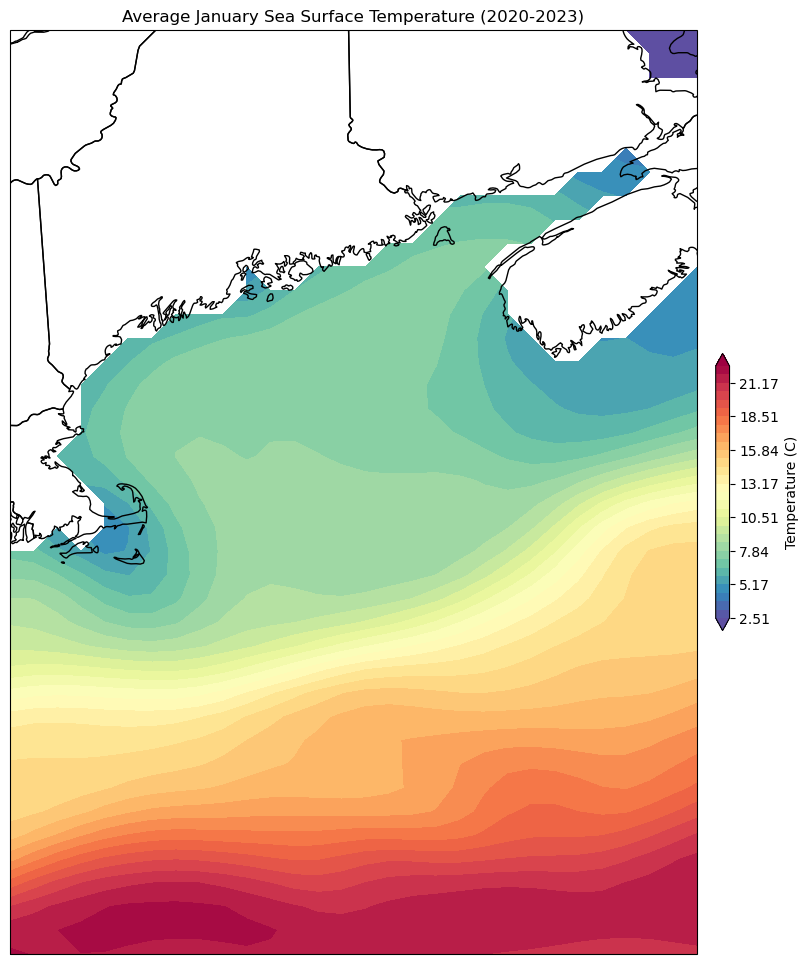

In [17]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(low_lim, high_lim, 31)

c=ax.contourf(sst_mean.lon, sst_mean.lat, sst_mean[0], cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Average '+month_name+' Sea Surface Temperature (2020-2023)')
clb.set_label('Temperature (C)')

ax.add_feature(cfeature.STATES)